# Проверка гипотезы экспоненциального роста
Загрузим данные из репозитория и инициируем словари в которые далее поместим данные о правдивости гипотезы для каждой страны.

In [1]:
import pandas as pd
from scipy import optimize

df = pd.read_csv('https://open-covid-19.github.io/data/data.csv')
df = df.set_index('Date')
confirmed_exp = dict()
deaths_exp = dict()

In [2]:
def get_outbreak_mask(data: pd.DataFrame, threshold: int = 10):
    ''' Returns a mask for > N confirmed cases '''
    return data['Deaths'] > threshold

## Предварительная обработка данных
Удалим данные для регионов и заполним недостающие данные. После этого сохраним обработанные данные для Power BI.

In [3]:
cols = ['CountryCode', 'CountryName', 'Confirmed', 'Deaths', 'RegionCode', 'Population']
df = df[cols]
df = df[df['RegionCode'].isna()]
df = df.drop(columns=['RegionCode'])
df[df['CountryName'] == 'South Sudan'] = df[df['CountryName'] == 'South Sudan'].fillna(11175744)
df[df['CountryName'] == 'Kosovo'] = df[df['CountryName'] == 'Kosovo'].fillna(1810366)
df = df.fillna(0)
df.to_csv('data.csv')

## Построение линейной регрессии
С помощью метода curve_fit строим регрессию и проверяем ее значимость с помощью критерия Фишера. Сначала для количества зараженных, а потом смертей.

In [4]:
def exponential_function(x: float, a: float, b: float, c: float):
    ''' a * (b ^ x) + c '''
    return a * (b ** x) + c

In [5]:
def f_test(Y, Y_est):
    Y_zip = zip(Y, Y_est)
    sse = sum([(y - y_est)**2 for y, y_est in Y_zip])
    rss = sum([(y_est - sum(Y)/len(Y))**2 for y_est in Y_est])
    F = rss*(len(Y)-2)/sse
    F_Crit = 6106.0
    print(F)
    return F>F_Crit

In [6]:
for country_name in df['CountryName'].unique():
    country = df[df['CountryName'] == country_name]
    if len(country) < 3:
        continue
    X, y = list(range(len(country))), country['Confirmed'].tolist()
    params, _ = optimize.curve_fit(exponential_function, X, y, maxfev=5000)
    estimate = [exponential_function(x, *params) for x in X]
    confirmed_exp[country_name] = f_test(y, estimate)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


5800.22968894561
17360.401544700348
2437.608646810597
6052.781642341535
496.819884201398
61274.86244515478
6458.787894372392
165874.99754784122
24484.15638132424
nan


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


5281.821861135805
4407.520467302788
3539.6233288027483
6285.673711871049
19316.1825830821
10313.769682004886
6247.54641456106
5471.8107540583915
11784.321041081554
5259.052905508962
13379.582848950702
4714.174093044401
4047.699840090736
2998.1499787139505
564.4284459219297
4216.040851363345
2996.995559869851
8029.61077603301
13408.839453042616
14442.993033233437
42279.24363569179
4596.294999906656
17369.988267793127
6324.908446609244
3545.8098660620876
1880.0759235203905
4382.812995981891
3429.8856077772634
3617.368401985975
nan
5134.56651299021
4102.919572160498
301.9065745182272
9614.105329278324
15767.52016578837
16944.138723574455
46884.44064985929
16335.617611253534
2390.770791276676
34833.13811535162
2168.846455097988
2250.1715463589776
5365.072998764051
2134.439681514324
7531.416285832974
8356.385301383221
26233.588979773842
3110.9448220516033
2756.3817305231073
7106.1101928498165
6863.592427612037
3390.6290795123036
694.1270968307609
nan
4033.1369524963034
15633.508649752674
32

In [7]:
for country_name in df['CountryName'].unique():
    country = df[df['CountryName'] == country_name]
    country = country[get_outbreak_mask(country)]
    if len(country) < 3:
        continue
    print(country_name)
    X, y = list(range(len(country))), country['Deaths'].tolist()
    params, _ = optimize.curve_fit(exponential_function, X, y, maxfev=5000)
    estimate = [exponential_function(x, *params) for x in X]
    deaths_exp[country_name] = f_test(y, estimate)

Andorra
412.650152266611
United Arab Emirates
1932.9951337287362
Afghanistan
2101.6669530365634
Albania
11817.099124460019
Armenia
5428.634848317317
Angola
45985.558416019834
Argentina
21834.581792990226
Austria
668.1758374626282
Australia
2068.279811363413
Aruba


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


2005.837939516826
Azerbaijan
5482.733090925047
Bosnia and Herzegovina
19649.895754391888
Bangladesh
15793.362660080094
Belgium
412.6613688946584
Burkina Faso
465.10181936722125
Bulgaria
9913.224229458438
Bahrain
27453.659304119337
Benin
321.92040212859445
Bolivia
4772.459225936831
Brazil
15303.497512639398
Bahamas
5939.183848134899
Botswana
1493.241944809508
Belarus
183696.58125786125
Belize
21464.508739187135
Canada
774.9968220870124
Democratic Republic of the Congo
6052.352273334325
Central African Republic
136.05986616344637
Republic of the Congo
3435.232983400655
Switzerland
363.4449419623536
Ivory Coast
2035.4572366425693
Chile
5274.266840019714
Cameroon
1038.2928776638205
China
414.82272794195853
Colombia
7832.113285049091
Costa Rica
15353.568182142251
Cuba
1123.625685692619
Cape Verde
10800.416419745785
Cyprus
2371.5762840764205
Czech Republic
21552.14617564751
Germany
481.694831727663
Djibouti
214.91596341862416
Denmark
459.28104564549704
Dominican Republic
10116.828639811274
A

Сохраняем в файлах полученные значения.

In [8]:
conf_exp = pd.Series(confirmed_exp).to_frame('Confirmed_exp')
conf_exp.index.name = 'Country'
conf_exp.to_csv('confirmed_exp.csv')
d_exp = pd.Series(deaths_exp).to_frame('Deaths_exp')
d_exp.index.name = 'Country'
d_exp.to_csv('deaths_exp.csv')

# Прогноз распространения
Для прогноза используем логистическую функцию Гомперца, которая является довольно точным краткосрочным предиктором будущих подтвержденных случаев. Попробуем получить данные на месяц вперед для каждой страны.

In [9]:
def logistic_function(x: float, a: float, b: float, c: float):
    ''' a * e^(-b * e^(-cx)) '''
    return a * np.exp(-b * np.exp(-c * x))

In [10]:
df1 = pd.DataFrame()

In [11]:
import datetime
import math
import numpy as np

FUTURE_DAYS = 30

# Append N new days to our indices
date_format = '%Y-%m-%d'

In [12]:
for country_name in df['CountryName'].unique():
    country = df[df['CountryName'] == country_name]
    country = country[get_outbreak_mask(country)]
    if len(country) < 3:
        continue
    _date_range = [datetime.datetime.strptime(date, date_format) for date in country.index]
    date_range = []
    for _ in range(FUTURE_DAYS): date_range.append(_date_range[-1] + datetime.timedelta(days=_))
    date_range = [datetime.datetime.strftime(date, date_format) for date in date_range]
    X, y = list(range(len(country))), country['Confirmed'].tolist()
    params, _ = optimize.curve_fit(logistic_function, X, y, maxfev=int(1E5), p0=[max(y), np.median(X), .1], bounds = (0, 3548390036.604))
# Perform projection with the previously estimated parameters
    confirmed = [round(logistic_function(x, *params)) for x in range(len(X), len(X) + FUTURE_DAYS)]
    confirmed = pd.Series(confirmed, index=date_range, name='Confirmed')
    X, y = list(range(len(country))), country['Deaths'].tolist()
    params, _ = optimize.curve_fit(logistic_function, X, y, maxfev=int(1E5), p0=[max(y), np.median(X), .1], bounds = (0, 3548390036.604))
# Perform projection with the previously estimated parameters
    deaths = [round(logistic_function(x, *params)) for x in range(len(X), len(X) + FUTURE_DAYS)]
    deaths = pd.Series(deaths, index=date_range, name='Deaths')
    df_ = pd.DataFrame({'Country': country_name, 'Confirmed': confirmed, 'Deaths': deaths})
    df1 = df1.append(df_)

In [13]:
df1.to_csv('predicted.csv')

# Кластеризация
Загружаем данные с параметрами, преобразуем их и с помощью алгоритма AgglomerativeClustering данные разбиваются на 2 кластера. Сохраняем данные и в Power BI делаем картограмму.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
sns.set()

df = pd.read_csv('params.csv')

In [15]:
df.columns = ['country', 'iso', 'conf_percent', 'death_percent', 'gdp', 'avg_income']
df = df.dropna()
cols_to_check = ['conf_percent', 'death_percent']
df[cols_to_check] = df[cols_to_check].replace({'%':''}, regex=True)
df[cols_to_check] = df[cols_to_check].replace({',':'.'}, regex=True)
df = df.reset_index()
df[cols_to_check] = df[cols_to_check].astype(float)

In [16]:
df1 = df[['conf_percent', 'death_percent', 'gdp', 'avg_income']]
ss = StandardScaler()
ss.fit_transform(df1)

array([[-5.54721703e-01, -3.44555271e-01, -3.12069080e-01,
        -7.38492318e-01],
       [-4.26449342e-01, -3.44555271e-01, -3.22779920e-01,
        -4.27002390e-01],
       [-5.54721703e-01, -3.44555271e-01, -1.39667697e-01,
        -5.31241145e-01],
       [-6.18857884e-01, -3.44555271e-01, -2.75910388e-01,
        -6.68591035e-01],
       [-4.90585523e-01, -3.44555271e-01, -6.90029932e-02,
         2.40857145e-02],
       [ 2.14912465e-01, -3.44555271e-01, -3.24644827e-01,
        -6.26486753e-01],
       [-4.26449342e-01, -3.44555271e-01,  6.21491952e-02,
         2.25540825e+00],
       [ 5.35593369e-01,  4.25627100e-01, -1.95566859e-01,
         1.69497165e+00],
       [-4.26449342e-01, -3.44555271e-01, -2.79835833e-01,
        -3.19084620e-01],
       [ 1.81831698e+00, -3.44555271e-01, -3.11977087e-01,
         1.60822435e-01],
       [-5.54721703e-01, -3.44555271e-01, -9.02569892e-02,
        -6.99862661e-01],
       [ 1.17695518e+00, -3.44555271e-01, -2.77572967e-01,
      

In [17]:
def doAgglomerative(X):
    model = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(df1)
agglomerative = pd.DataFrame(clust_labels1)
df1.insert((df1.shape[1]),'agglomerative', agglomerative)

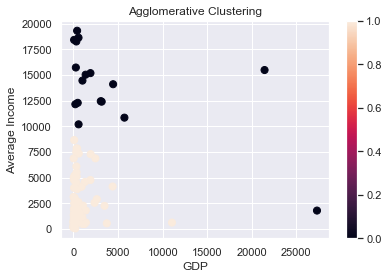

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['gdp'],df1['avg_income'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('GDP')
ax.set_ylabel('Average Income')
plt.colorbar(scatter)

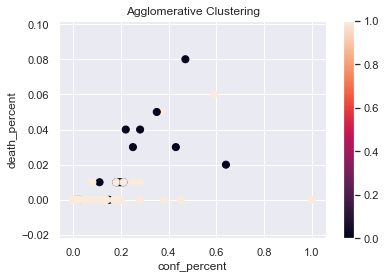

In [19]:
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df1['conf_percent'],df1['death_percent'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('conf_percent')
ax.set_ylabel('death_percent')
plt.colorbar(scatter)

In [20]:
df1.insert(0,'Country',df.iloc[:,1])

In [21]:
df1.to_csv('clusters.csv')